In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

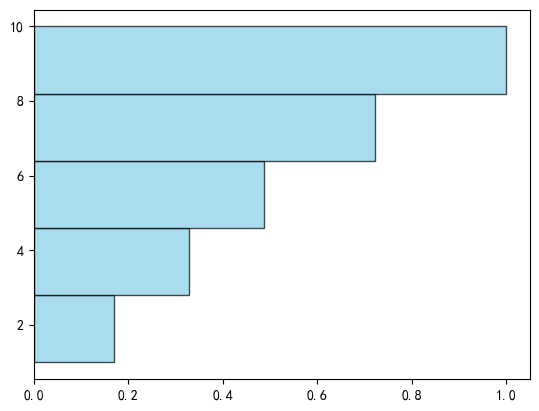

直方图的y轴：[0.17105263 0.32894737 0.48684211 0.72368421 1.        ]
直方图的x轴：[ 1.   2.8  4.6  6.4  8.2 10. ]


In [3]:
# 生成随机数据
np.random.seed(1)
data = np.random.randint(1,15,size=100)

# 绘制直方图
h = plt.hist(data, 
         range=(1,10), # 数据范围，超出范围的值会被忽略
         bins = 5, # 指定柱子数量
         density=True, # 显示频率而非计数
         cumulative=True, # 绘制累积分布直方图
         align='mid', # 调整柱子边缘对齐
         color='skyblue',  # 柱子颜色
         edgecolor='black',  # 边框颜色
         alpha=0.7,  # 透明度(0-1)
         orientation='horizontal'  # 水平方向
)

plt.show()

# 打印函数回传值
# 列表类型，列表第0个元素是y轴的值，即x轴值的频率值或计数值
# 列表第1个元素是x轴的各bin分割点的坐标值
print(f"直方图的y轴：{h[0]}")
print(f"直方图的x轴：{h[1]}")

# 2、使用示例：

## 2.1 bins参数

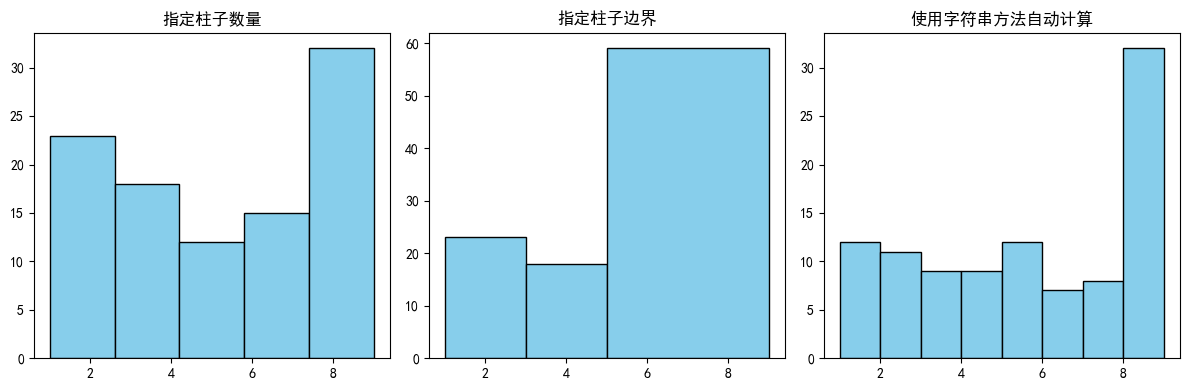

In [4]:
# 生成随机数据
np.random.seed(1)
data = np.random.randint(1,10,size=100)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(data, bins=5,color='skyblue',edgecolor='black')
plt.title('指定柱子数量')

plt.subplot(132)
plt.hist(data, bins=[1,3,5,9],color='skyblue',edgecolor='black')
plt.title('指定柱子边界')

plt.subplot(133)
# 其他选项: 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt'
plt.hist(data, bins='sturges',color='skyblue',edgecolor='black')
plt.title('使用字符串方法自动计算')

plt.tight_layout()
plt.show()

## 2.2 直方图类型（histtype参数）：

运行后可以直观看到四种类型的区别：

bar：标准柱状分布，有明显分隔
barstacked：多组数据堆叠显示，适合展示总和与构成
step：仅显示轮廓线，强调分布形状
stepfilled：带填充的轮廓线，兼顾形状和面积感

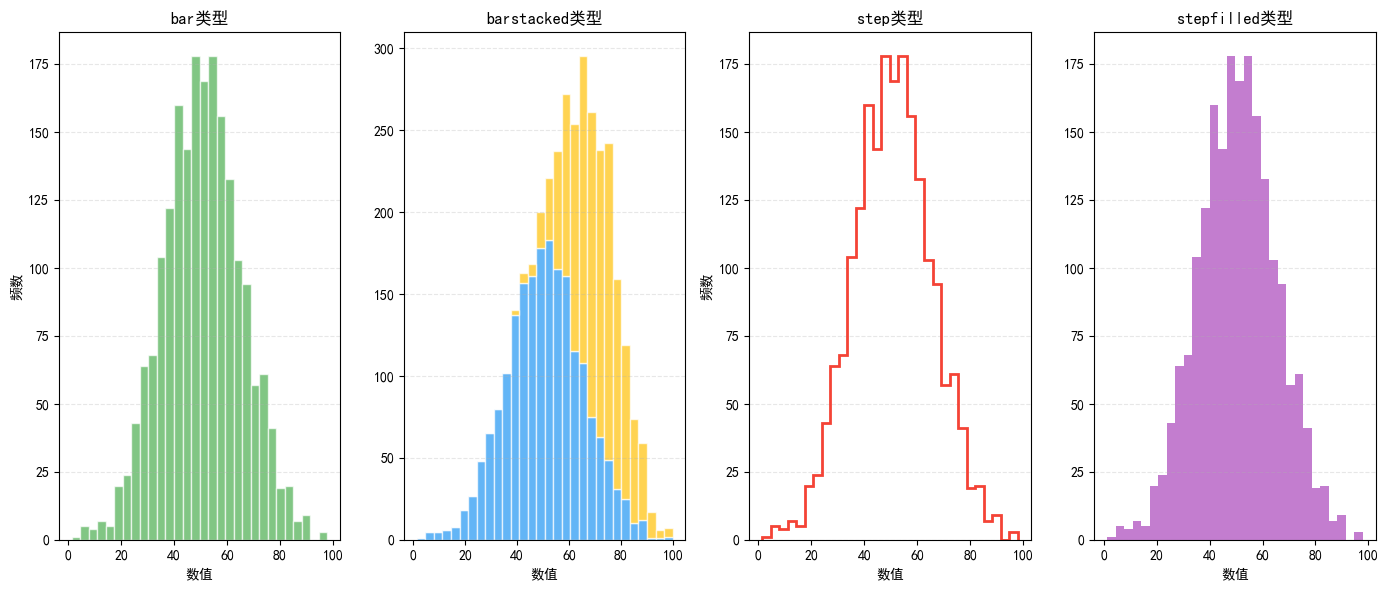

In [5]:
# 生成示例数据
np.random.seed(42)
data = np.random.normal(50, 15, 2000)  # 正态分布数据
data = data[(data >= 0) & (data <= 100)]  # 过滤合理范围外的值

# 创建画布
plt.figure(figsize=(14, 6))

# 1. bar类型（默认）
plt.subplot(141)
plt.hist(data, bins=30, histtype='bar', color='#4CAF50', edgecolor='white', alpha=0.7)
plt.title('bar类型', fontsize=12)
plt.xlabel('数值', fontsize=10)
plt.ylabel('频数', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 2. barstacked类型（添加第二组数据展示堆叠效果）
plt.subplot(142)
data2 = np.random.normal(70, 10, 1500)
data2 = data2[(data2 >= 0) & (data2 <= 100)]
plt.hist([data, data2], bins=30, histtype='barstacked', 
         color=['#2196F3', '#FFC107'], edgecolor='white', alpha=0.7)
plt.title('barstacked类型', fontsize=12)  # 修正标题错误
plt.xlabel('数值', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 3. step类型
plt.subplot(143)
plt.hist(data, bins=30, histtype='step', color='#F44336', linewidth=2)
plt.title('step类型', fontsize=12)  # 修正标题错误
plt.xlabel('数值', fontsize=10)
plt.ylabel('频数', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 4. stepfilled类型
plt.subplot(144)
plt.hist(data, bins=30, histtype='stepfilled', color='#9C27B0', alpha=0.6)
plt.title('stepfilled类型', fontsize=12)
plt.xlabel('数值', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 调整布局
plt.tight_layout()
plt.show()


## 2.3 添加统计信息标注

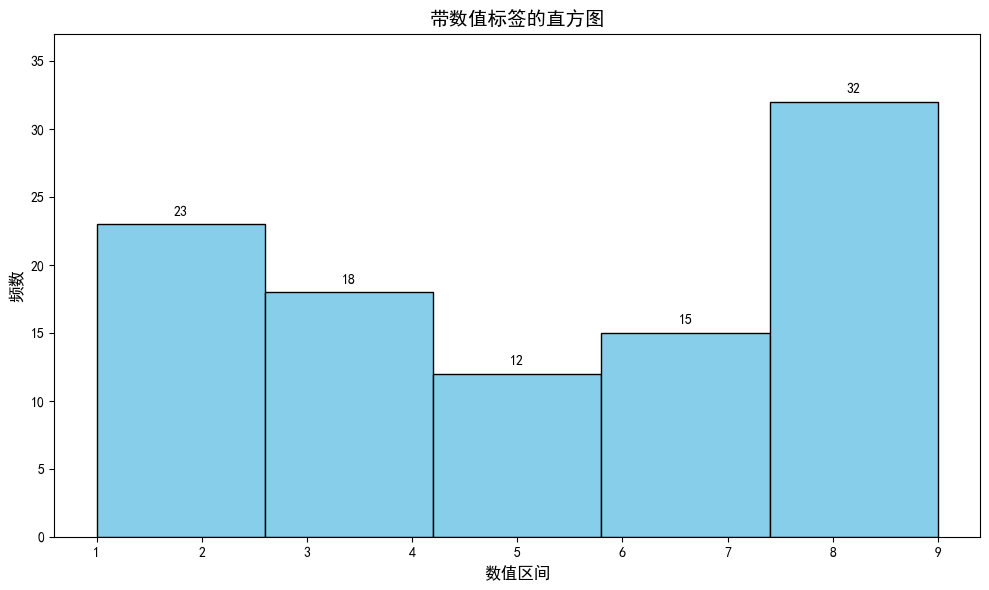

In [6]:
# 生成随机数据
np.random.seed(1)
data = np.random.randint(1, 10, size=100)

# 绘制直方图
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data, bins=5, color='skyblue', edgecolor='black')

# 添加数值标签
for i in range(len(patches)):
    # 获取每个矩形的高度（频数）
    height = n[i]
    # 在矩形上方居中位置添加标签
    plt.text(
        patches[i].get_x() + patches[i].get_width() / 2,  # x坐标（矩形中心）
        height + 0.5,  # y坐标（矩形顶部+少量偏移）
        f'{int(height)}',  # 标签文本（频数，转换为整数）
        ha='center',  # 水平居中
        va='bottom',  # 垂直底部对齐
        fontsize=10
    )

# 添加标题和坐标轴标签
plt.title('带数值标签的直方图', fontsize=14)
plt.xlabel('数值区间', fontsize=12)
plt.ylabel('频数', fontsize=12)

# 设置y轴范围，留出标签空间
plt.ylim(0, max(n) + 5)

plt.tight_layout()
plt.show()


## 2.4 堆叠与分组显示

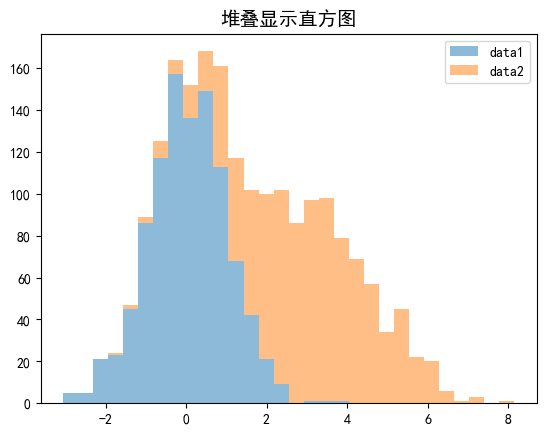

In [7]:
# 生成两组数据
np.random.seed(1)
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(3, 1.5, 1000)

# 堆叠显示
plt.hist([data1, data2], bins=30, stacked=True,alpha=0.5,label=["data1","data2"])
plt.legend()
plt.title('堆叠显示直方图', fontsize=14)
plt.show()

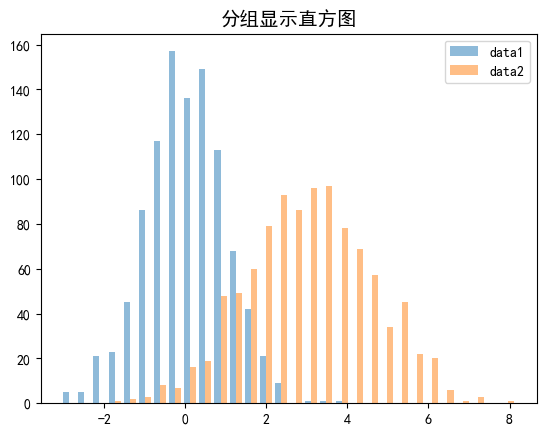

In [8]:
# 生成两组数据
np.random.seed(1)
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(3, 1.5, 1000)

# 堆叠显示
plt.hist([data1, data2], bins=30,alpha=0.5,label=["data1","data2"], histtype='bar')
plt.legend()
plt.title('分组显示直方图', fontsize=14)
plt.show()

## 2.5 组合图（叠加核密度估计KDE）

hist()函数和plot()函数混合使用

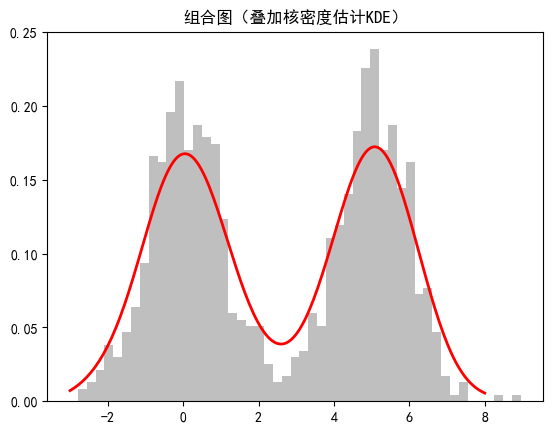

In [9]:
from scipy.stats import gaussian_kde

# 通过拼接两个正态分布数据创建了一个双峰分布数据集
np.random.seed(1)
data = np.concatenate([np.random.normal(0, 1, 500),
                       np.random.normal(5, 1, 500)])

# 绘制直方图
plt.hist(data, bins=50, density=True, alpha=0.5, color='gray')

# 添加KDE曲线
# 用scipy.stats.gaussian_kde()计算数据的核密度估计，得到密度函数density
density = gaussian_kde(data)
# 生成 x 轴取值范围（如np.linspace(-3, 8, 200)），覆盖数据的合理区间
xs = np.linspace(-3, 8, 200)
# 通过plt.plot(xs, density(xs))绘制核密度曲线，设置颜色（如'r-'红色实线）和线宽（如2）突出显示
plt.plot(xs, density(xs), 'r-', linewidth=2)
plt.title('组合图（叠加核密度估计KDE）')
plt.show()